# Noising Experiments for q = 0 and Gaussian Noise


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from utils.images_generator import gaussian_noise_gs, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from itertools import combinations

### Plotting Gaussian

Imagens default

In [20]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data_list.append(image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [22]:
image_data_list

[   q  Smoothness  Curve structure  Weighted Entropy Correct  \
 0  0    0.647201         0.019466                  0.636708   
 
    Weighted Complexity Correct     prob0     prob1  prob2  image_name  
 0                     0.320872  0.980534  0.019466    0.0  colored_k6  ,
    q  Smoothness  Curve structure  Weighted Entropy Correct  \
 0  0    0.666667              0.0                      -0.0   
 
    Weighted Complexity Correct  prob0  prob1  prob2   image_name  
 0                         -0.0    1.0    0.0    0.0  uniform 127  ]

In [23]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,0,0.647201,0.019466,0.636708,0.320872,0.980534,0.019466,0.0,colored_k6
1,0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.0,uniform 127


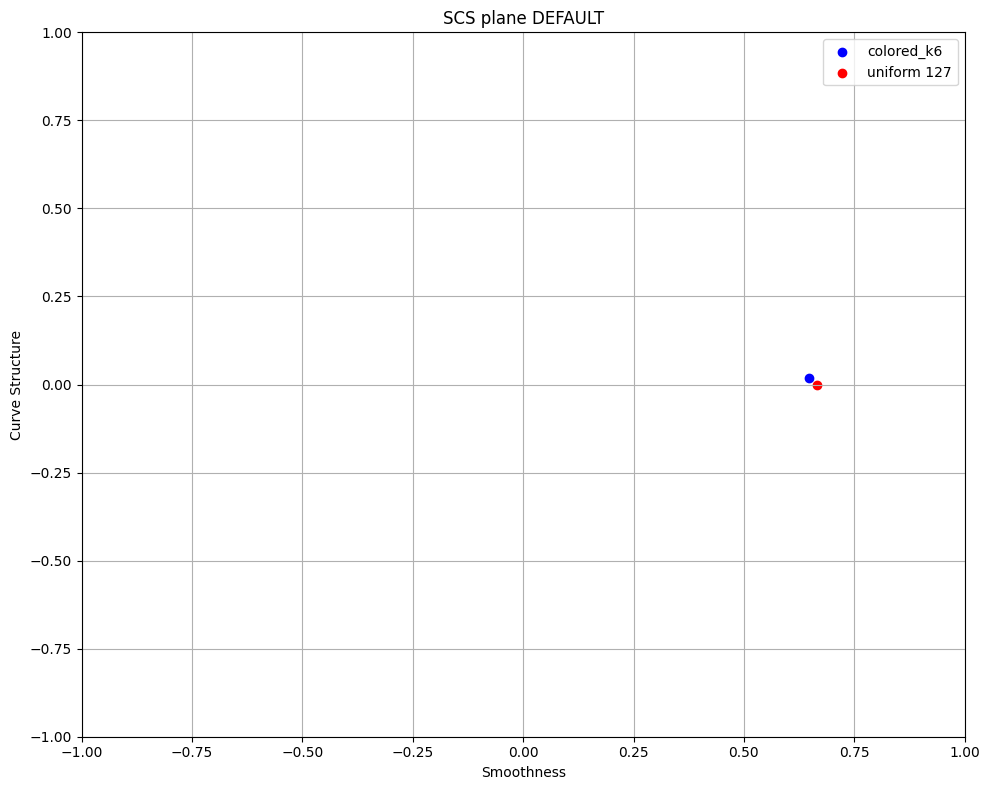

In [27]:
figname_to_color = {
    'colored_k6': 'blue',
    'uniform 127': 'red'
}
unique_default_images = data_default_aux['image_name'].unique()

plt.subplots(figsize=(10, 8))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
plt.title(f'SCS plane DEFAULT')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

--------------------------

In [4]:
image_data = pd.read_csv(f"results/noise_analysis/gaussian/gaussian_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/gaussian/gaussian_analysis_default.csv")


In [3]:
image_data.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,mean_value,sd_value
0,-2.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png,-30,0
1,-1.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png,-30,0
2,0.0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,-30,0
3,1.0,0.311469,0.222770,0.904898,0.120397,0.644803,0.288984,0.066214,canesugar01-r000-s001.png,-30,0
4,2.0,0.379436,0.225311,0.868004,0.164374,0.712770,0.256271,0.030960,canesugar01-r000-s001.png,-30,0


In [4]:
image_data_default.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,mean_value,sd_value
0,-2.0,0.382341,0.004843,0.839389,0.194686,0.715674,0.144584,1.397416e-01,colored_k6,-50,0
1,-1.0,0.591636,0.053651,0.730293,0.276027,0.924969,0.064341,1.069023e-02,colored_k6,-50,0
2,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,4.098081e-04,colored_k6,-50,0
3,1.0,0.648960,0.017677,0.630566,0.321912,0.982293,0.017692,1.461078e-05,colored_k6,-50,0
4,2.0,0.653820,0.012846,0.603298,0.323580,0.987153,0.012846,5.297810e-07,colored_k6,-50,0


In [5]:
filenames = image_data.image_name.unique()
img_default_names = image_data_default.image_name.unique()
print(filenames)
print(img_default_names)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']
['colored_k6' 'uniform 127']


In [6]:
print("Image data MEANS unique",image_data.mean_value.unique())
print("Image data SD unique",image_data.sd_value.unique())
print("Default data MEANS unique",image_data_default.mean_value.unique())
print("Default data SD unique",image_data_default.sd_value.unique())

Image data MEANS unique [-30   0  30]
Image data SD unique [ 0 20 50]
Default data MEANS unique [-50 -20   0  20  50]
Default data SD unique [ 0 10 20 40 50]


In [7]:
default_data = image_data_default 
dataset_data = image_data[(image_data['image_name'] != 'colored_k6') & (image_data['image_name'] != 'uniform 127')]

In [8]:
print(dataset_data.shape)
dataset_data.head()

(5175, 11)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,mean_value,sd_value
0,-2.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png,-30,0
1,-1.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png,-30,0
2,0.0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,-30,0
3,1.0,0.311469,0.222770,0.904898,0.120397,0.644803,0.288984,0.066214,canesugar01-r000-s001.png,-30,0
4,2.0,0.379436,0.225311,0.868004,0.164374,0.712770,0.256271,0.030960,canesugar01-r000-s001.png,-30,0


Plotting the plane for the default images (q=0)

In [9]:
default_data_q0 = default_data[(default_data['q'] == 0)]
print(default_data.shape)
print(default_data_q0.shape)
default_data_q0.head()

(1150, 11)
(50, 11)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,mean_value,sd_value
2,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,0.000410,colored_k6,-50,0
25,0.0,0.016984,0.009699,0.999646,0.000463,0.350318,0.329691,0.319992,colored_k6,-50,10
48,0.0,0.002504,0.006284,0.999665,0.000438,0.335838,0.335223,0.328939,colored_k6,-50,20
71,0.0,0.001616,0.001298,0.999670,0.000435,0.334950,0.333174,0.331876,colored_k6,-50,40
94,0.0,-0.000911,-0.014480,0.999794,0.000269,0.332423,0.326549,0.341029,colored_k6,-50,50


In [10]:
default_data[(default_data['q'] == 0) & (default_data['sd_value'] == 0)]

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,mean_value,sd_value
2,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,0.00041,colored_k6,-50,0
117,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,0.00041,colored_k6,-20,0
232,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,0.00041,colored_k6,0,0
347,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,0.00041,colored_k6,20,0
462,0.0,0.637775,0.028072,0.663286,0.313664,0.971109,0.028482,0.00041,colored_k6,50,0
577,0.0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.00000,uniform 127,-50,0
692,0.0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.00000,uniform 127,-20,0
807,0.0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.00000,uniform 127,0,0
922,0.0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.00000,uniform 127,20,0
1037,0.0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.00000,uniform 127,50,0


In [11]:
default_data_q0['image_name'].unique()

array(['colored_k6', 'uniform 127'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_14616\3643246629.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_14616\3643246629.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_14616\3643246629.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k--" (-> color='k'). The keyword argument will take prec

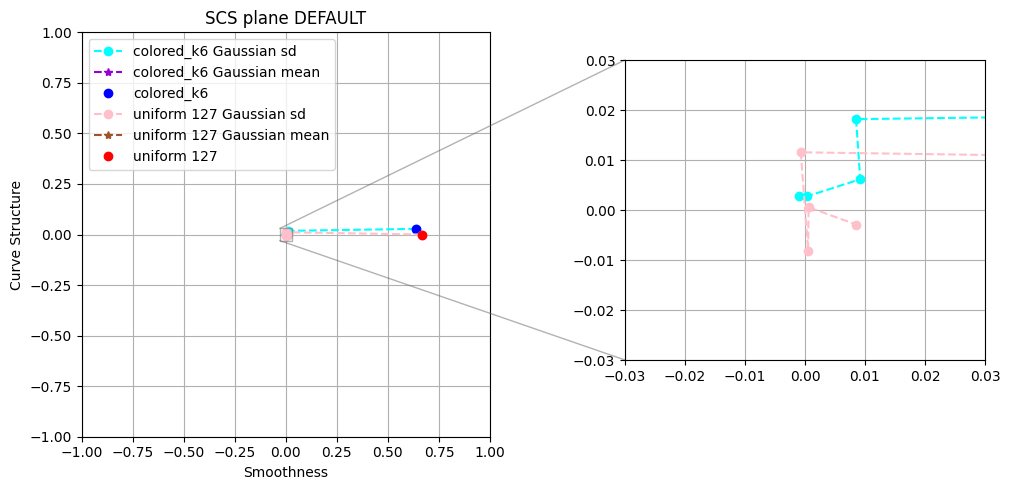

In [15]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_sd': 'cyan',
    'colored_k6_noise_mean': 'darkviolet',
    'uniform 127': 'red',
    'uniform 127_noise_sd': 'pink',
    'uniform 127_noise_mean': 'sienna'
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(6, 5))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    # get data varying mean and setting sd as 0
    df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane DEFAULT')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = -0.03, 0.03, -0.03, 0.03
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_36752\2385214221.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_36752\2385214221.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")


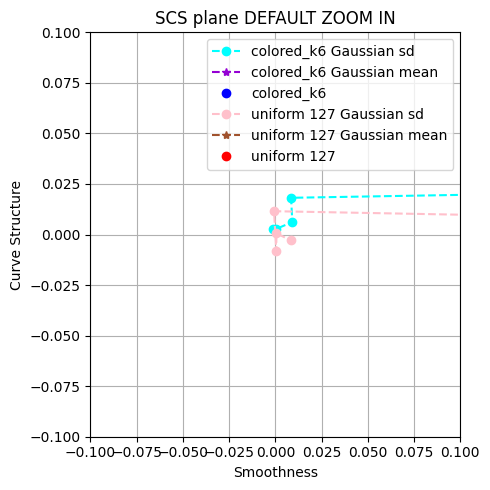

In [55]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_sd': 'cyan',
    'colored_k6_noise_mean': 'darkviolet',
    'uniform 127': 'red',
    'uniform 127_noise_sd': 'pink',
    'uniform 127_noise_mean': 'sienna'
}
unique_default_images = default_data_q0['image_name'].unique()

plt.subplots(figsize=(5, 5))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    plt.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    # get data varying mean and setting sd as 0
    df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    plt.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
plt.title(f'SCS plane DEFAULT ZOOM IN')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

Plotting the plane for the dataset images (q=0)

In [5]:
dataset_data_q0 = dataset_data[(dataset_data['q'] == 0)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(5175, 11)
(225, 11)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,mean_value,sd_value
2,0.0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,-30,0
25,0.0,0.061722,0.073697,0.995791,0.005550,0.395055,0.339321,0.265624,canesugar01-r000-s001.png,-30,20
48,0.0,0.015277,0.019466,0.999680,0.000420,0.348610,0.335428,0.315962,canesugar01-r000-s001.png,-30,50
71,0.0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0,0
94,0.0,0.061790,0.082235,0.995433,0.006034,0.395123,0.343556,0.261321,canesugar01-r000-s001.png,0,20


In [6]:
filenames_dataset = dataset_data_q0['image_name'].unique()
filenames_dataset

array(['canesugar01-r000-s001.png', 'canvas01-r000-s001.png',
       'couscous01-r000-s001.png', 'fabric01-r000-s001.png',
       'fabric02-r000-s001.png', 'fabric03-r000-s001.png',
       'fabric04-r000-s001.png', 'fabric05-r000-s001.png',
       'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png',
       'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png',
       'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png',
       'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png',
       'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png',
       'seeds01-r000-s001.png', 'seeds02-r000-s001.png',
       'sprinkles01-r000-s001.png', 'tile01-r000-s001.png',
       'towel01-r000-s001.png', 'wheat01-r000-s001.png',
       'wool01-r000-s001.png'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_10144\864128694.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_10144\864128694.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")


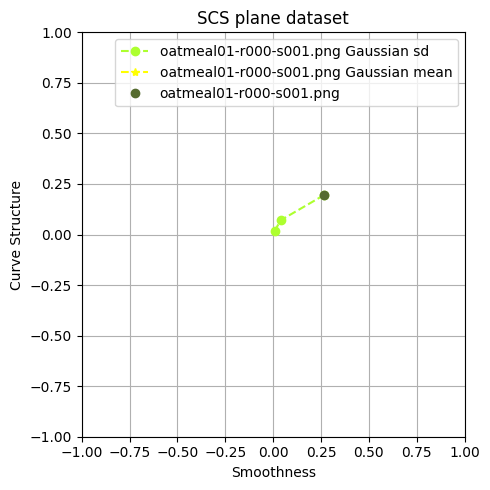

In [7]:
figname = 'oatmeal01-r000-s001.png'
figname_to_color = {
    f'{figname}': 'darkolivegreen',
    f'{figname}_noise_sd': 'greenyellow',
    f'{figname}_noise_mean': 'yellow'
}
unique_dataset_images = dataset_data_q0['image_name'].unique()
unique_dataset_images = [figname]
plt.subplots(figsize=(5, 5))

for i, imageName in enumerate(unique_dataset_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    plt.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName} Gaussian sd")
    # get data varying mean and setting sd as 0
    df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    plt.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]

# Set title and labels for the subplot
plt.title(f'SCS plane dataset')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

In [8]:
dataset_data_q0['sd_value'].unique()

array([ 0, 20, 50], dtype=int64)

In [ ]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 6
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    # pick a mean and sd
    mean_chosen = 0
    sd_values = dataset_data_q0['sd_value'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, sd_chosen in enumerate(sd_values):
        # noised image
        noised_image = gaussian_noise_gs(mean_chosen, sd_chosen, gs_image)
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} sd {sd_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # plots the original plane and ZOOMED IN
    for index in range(4, 6):
        # get data varying sd and setting mean as 0
        df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
        axs[i][index].plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} Gaussian sd")
        # get data varying mean and setting sd as 0
        df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
        axs[i][index].plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=dict_color[f"noise_mean"], label=f"{imageName} Gaussian mean")
        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
        # plot it
        axs[i][index].plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        # for j,sd_chosen in scatter_idxs:

        #     # Add colorbar for each subplot
        #     cbar = fig.colorbar(scatter, ax=axs[i][j])
        #     cbar.set_label('q')
        #     # Set title and labels for the subplot
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        if index == 4:
            axs[i][index].set_title('SCS plane')
            axs[i][index].set_xlim([-1, 1])
            axs[i][index].set_ylim([-1, 1])
        else:
            axs[i][index].set_title('SCS plane ZOOM')
            axs[i][index].set_xlim([-0.2, 0.2])
            axs[i][index].set_ylim([-0.2, 0.2])
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/planes/gaussian_dataset_comparing_SCSplane_q0.png', bbox_inches='tight')
# Show the plot
plt.show()